In [ ]:
# Link to resources
#https://github.com/ranaroussi/yfinance/blob/master/README.rst

In [ ]:
#Install yfinance and yaloofinancials via mac terminal
#python3   -m pip install yfinance
#python3   -m pip install yahoofinancials

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
#import yahoofinancials

In [48]:
#Import stock data
df_tsla = yf.download('TSLA').dropna()
df_wow = yf.download('WOW.AX').dropna()
df_aord = yf.download('^AORD').dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [49]:
df_wow.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-05,35.349998,35.529999,34.980000,35.310001,35.310001,2466018.0
2020-05-06,35.020000,35.290001,34.740002,35.119999,35.119999,2062787.0
2020-05-07,35.189999,35.270000,34.700001,34.910000,34.910000,3188886.0
2020-05-08,34.990002,35.060001,34.480000,34.700001,34.700001,2322743.0
2020-05-11,34.500000,34.990002,34.310001,34.740002,34.740002,3422797.0


In [59]:
#df_tsla.head()


df_aord['D_chg_aord'] = (df_aord['Close']/df_aord['Open'])-1
df_wow['D_chg_wowax'] = (df_wow['Close']/df_wow['Open'])-1

# df_combine = pd.merge(left=df_aord, right=df_wow, left_on='Date', right_on='Date').set_index('Date').dropna()

# df_combine.head()

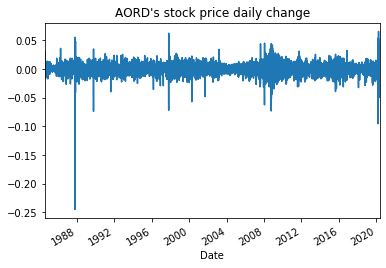

In [72]:
ticker = yf.Ticker('^AORD')

df_aord = ticker.history(period="max")
df_aord['D_chg_aord'] = (df_aord['Close']/df_aord['Open'])-1
df_aord['D_chg_aord'].plot(title="AORD's stock price daily change")


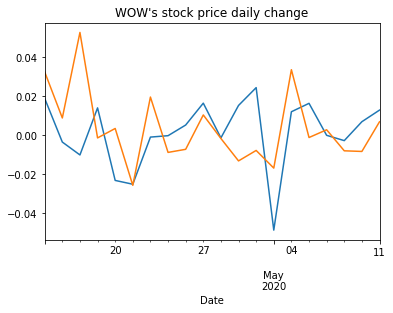

In [115]:
ticker = yf.Ticker('^AORD')

#df_aord = ticker.history(period="5y")
#only looking at last 60 days
df_aord = ticker.history(interval="1d")

df_aord['D_chg_aord'] = (df_aord['Close']/df_aord['Open'])-1
df_aord['D_chg_aord'].plot(title="AORD's stock price daily change")
#df_aord['Open'].plot(title="AORD's stock price daily change")
#df_aord['Close'].plot(title="AORD's stock price daily change")

ticker = yf.Ticker('WOW.AX')
df_wow = ticker.history(interval="1d")
df_aord['D_chg_aord'] = (df_wow['Close']/df_wow['Open'])-1
df_aord['D_chg_aord'].plot(title="WOW's stock price daily change")

In [110]:
df_aord.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,D_chg_aord
Date,,,,,,,,
2020-05-11,5540.9,5557.0,5534.2,5552.5,0,0,0,0.002094
2020-05-11,5552.6,5560.2,5548.8,5558.0,0,0,0,0.000973
2020-05-11,5556.1,5574.1,5549.1,5574.1,0,0,0,0.003240
2020-05-11,5576.4,5587.4,5571.6,5580.6,0,0,0,0.000753
2020-05-11,5580.7,5580.7,5562.6,5565.7,0,0,0,-0.002688


In [95]:
#exploring the ticker details
ticker = yf.Ticker('WOW.AX')
# df_wowt = ticker.info
#df_wowt = ticker.recommendations
# df_wowt = ticker.actions
# df_wowt = ticker.major_holders
#upcoming events
# df_wowt = ticker.calendar 

df_wowt = ticker.institutional_holders

print(df_wowt)

                                              Holder    Shares Date Reported  \
0  Vanguard International Stock Index-Total Intl ...  20213184    2019-10-31   
1  Vanguard Tax Managed Fund-Vanguard Developed M...   7950210    2019-12-31   
2                         iShares Core MSCI EAFE ETF   5680975    2020-01-31   
3                              iShares MSCI Eafe ETF   5434468    2020-01-31   
4           iShares MSCI EAFE Minimum Volatility ETF   4426094    2020-01-31   
5                  Fidelity International Index Fund   2559695    2020-01-31   
6  Vanguard Intl Equity Index Fds-FTSE All World ...   2252926    2019-10-31   
7                         iShares MSCI Australia ETF   1908227    2020-01-31   
8                  iShares MSCI Pacific Ex-Japan ETF   1594000    2020-01-31   
9     College Retirement Equities Fund-Stock Account   1484032    2019-12-31   

    % Out      Value  
0  0.0160  754356026  
1  0.0063  287479593  
2  0.0045  237691994  
3  0.0043  227378141  
4  0

In [99]:
import yahoofinancials

In [102]:
y_fin = yahoofinancials('^AORD')

data = y_fin.get_historical_price_data(start_date='2000-01-01', 
                                                  
                                                  time_interval='weekly')

tsla_df = pd.DataFrame(data['TSLA']['prices'])
tsla_df = tsla_df.drop('date', axis=1).set_index('formatted_date')
tsla_df.head()

TypeError: 'module' object is not callable

In [130]:
import yfinance as yf
data = yf.download("^AORD WOW.AX QAN.AX", columns=['Open','Close'], start="2017-01-01",
                   group_by="ticker")

[*********************100%***********************]  3 of 3 completed


In [131]:
data.head()

^AORD                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2017-01-03  5720.700195  5788.100098  5720.700195  5784.600098  5784.600098   
2017-01-04  5784.600098  5792.899902  5781.200195  5788.200195  5788.200195   
2017-01-05  5788.200195  5811.700195  5788.200195  5805.100098  5805.100098   
2017-01-06  5805.100098  5818.399902  5801.399902  5809.000000  5809.000000   
2017-01-09  5809.000000  5876.799805  5808.200195  5857.700195  5857.700195   

                            WOW.AX                                   \
                 Volume       Open       High        Low      Close   
Date                                                                  
2017-01-03  498198500.0  24.400000  24.450001  24.290001  24.370001   
2017-01-04  615850600.0  24.389999  24.389999  24.209999  24.350000   
2017-01-05  573008400.0  24.400000  24.420000  24.260000  24.280001   
2017-01-06  602420000.0  24.209999  24.389999  24.100000  24.190001   
2017-01-09  651872400.0  24.299999  24.650000  24.280001  24.389999   

                               QAN.AX                                        
            Adj Close   Volume   Open   High   Low Close Adj Close   Volume  
Date                                                                         
2017-01-03  21.837626  1862651   3.37  3.380  3.35  3.38  2.977655  3173997  
2017-01-04  21.819706  1990360   3.37  3.375  3.33  3.34  2.942416  3037241  
2017-01-05  21.756981  1633514   3.35  3.365  3.32  3.34  2.942416  3377598  
2017-01-06  21.676332  1616859   3.36  3.370  3.33  3.33  2.933607  2584745  
2017-01-09  21.855545  3429436   3.35  3.360  3.33  3.35  2.951226  2073992